# Setup

In [ ]:
# import all the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo

# fetch dataset
heart_disease = fetch_ucirepo(id=45)

# data (as pandas dataframes)
X = heart_disease.data.features
df = pd.DataFrame(X)

# Add the target (y) as a new column
df['target'] = heart_disease.data.targets

# Display the first few rows
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


# Step 2: Exploring

### Exploring the dataset

In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [ ]:
#Missing values

df.isnull().sum() #So some fluoroscopy and thalassemia data missing

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


### Subplots for Sex and Age

<BarContainer object of 2 artists>

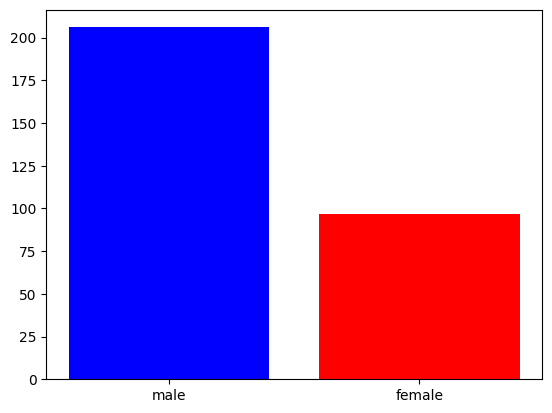

In [ ]:
#Sex
sex_counts = df["sex"].value_counts()
sex_counts

plt.bar(["male", "female"], sex_counts.values, color = ["Blue", "Red"]) #Skewed to female

(array([ 0.,  0.,  0.,  1.,  2., 12., 40., 32., 56., 69., 50., 31.,  8.]),
 array([10., 15., 20., 25., 30., 35., 40., 45., 50., 55., 60., 65., 70.,
        75.]),
 <BarContainer object of 13 artists>)

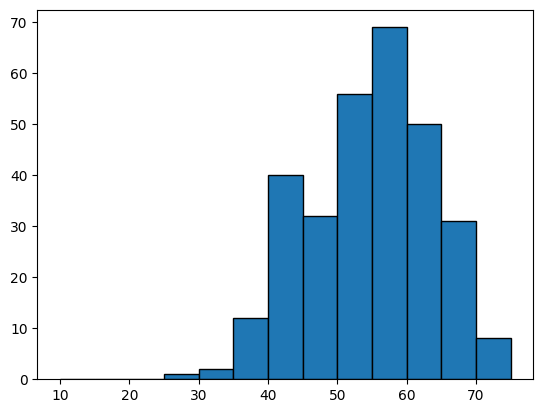

In [ ]:
#Age

bins = np.arange(10,76,5)

plt.hist(df["age"], bins, edgecolor = "black")

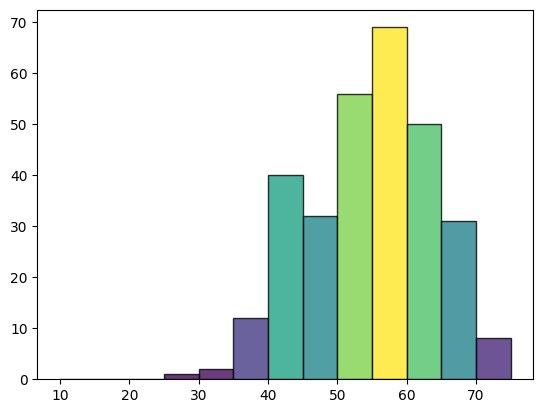

In [ ]:
N, bins, patches = plt.hist(df["age"], bins, edgecolor = "black", alpha = 0.8)

# We'll color code by height, but you could use any scalar
fracs = N / N.max()

for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(thisfrac)
    thispatch.set_facecolor(color)

plt.show()

In [ ]:
avg = df["age"].mean().round(2)
std = df["age"].std() #Outputs a weird object that doesn't have pandas round property apparently.

print(f"This cohort has an average age of {avg} with a std deviation of {round(std, 2)}")

This cohort has an average age of 54.44 with a std deviation of 9.04


**Fill in the blanks:**
1. The dataset has more candidates with Sex = Male.
2. The dataset distribution of the Age of candidates is 54.44, SD= 9.04.

In [ ]:
# Create a table to show the Sex distribution
sex_values = df["sex"].value_counts()

sex_values.index = ["Male", "Female"]
# values["Other"] =5
sex_values

,count
Male,206
Female,97


In [ ]:
# Create a table to show the Age distribution
age_values = df["age"].value_counts(bins=[0,10,20,30,40,50,60,70,80]).sort_index()

age_values.index = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80']

age_values

,count
0-10,0
10-20,0
20-30,1
30-40,17
40-50,76
50-60,130
60-70,73
70-80,6


# Step 3: Data Cleaning

In [ ]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [ ]:
# Showing all pt w/ a null value

# df[df["ca"].isnull() | df["thal"].isnull()] OR

df[df.isna().any(axis=1)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
87,53,0,3,128,216,0,2,115,0,0.0,1,0.0,NaN,0
166,52,1,3,138,223,0,0,169,0,0.0,1,NaN,3.0,0
192,43,1,4,132,247,1,2,143,1,0.1,2,NaN,7.0,1
266,52,1,4,128,204,1,0,156,1,1.0,2,0.0,NaN,2
287,58,1,2,125,220,0,0,144,0,0.4,2,NaN,7.0,0
302,38,1,3,138,175,0,0,173,0,0.0,1,NaN,3.0,0


In [ ]:
# Removing all rows with null values OR replacing null values with the mean of the column

df["ca"] = df["ca"].fillna(df["ca"].mean())
df["thal"] = df["thal"].fillna(df["thal"].mean())

df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [ ]:
# Changing the target column to be just True or False

def binary(Dx):
  if Dx == 0:
    return False
  else:
    return True

df["target"] = df["target"].apply(binary)

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,False
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,True
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,True
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,False
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,False


In [ ]:
#Alt solution

df["target"] = df["target"] >0

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,False
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,True
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,True
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,False
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,False


# Step 4: Feature Analysis

My four chosen features are:
- trestbps (resting blood pressure)
- chol (cholesterol)
- fbs (hyperglycemia)
- oldpeak (ST Depression)

In [ ]:
# Calculating the mean, variance and standard deviation of
# each of my four features for the whole dataset
full = {
  "trestbps" : "resting blood pressure",
  "chol" : "cholesterol",
  "fbs" : "fasting blood sugar",
  "oldpeak" : "ST Depression"
}

features = ["trestbps", "chol", "fbs", "oldpeak"]

for i in features:
  print(f"For {full[i]}, the mean is {round(df[i].mean(),2)}")
  print(f"For {full[i]}, the variance is {round(df[i].var(),2)}")
  print(f"For {full[i]}, the standard deviation is {round(df[i].std(),2)} \n")


For resting blood pressure, the mean is 131.69
For resting blood pressure, the variance is 309.75
For resting blood pressure, the standard deviation is 17.6 

For cholesterol, the mean is 246.69
For cholesterol, the variance is 2680.85
For cholesterol, the standard deviation is 51.78 

For fasting blood sugar, the mean is 0.15
For fasting blood sugar, the variance is 0.13
For fasting blood sugar, the standard deviation is 0.36 

For ST Depression, the mean is 1.04
For ST Depression, the variance is 1.35
For ST Depression, the standard deviation is 1.16 



In [ ]:
# Calculating the mean, variance and standard deviation of
# each of my four features for just rows that have heart disease

df_filtered = df[df["target"] == True]
df_healthy = df[df["target"] == False]

for i in features:
  print(f"For {full[i]} in patients with heart disease, the mean is {round(df_filtered[i].mean(),2)}")
  print(f"For {full[i]} in patients with heart disease, the variance is {round(df_filtered[i].var(),2)}")
  print(f"For {full[i]} in patients with heart disease, the standard deviation is {round(df_filtered[i].std(),2)} \n")

For resting blood pressure in patients with heart disease, the mean is 134.57
For resting blood pressure in patients with heart disease, the variance is 352.28
For resting blood pressure in patients with heart disease, the standard deviation is 18.77 

For cholesterol in patients with heart disease, the mean is 251.47
For cholesterol in patients with heart disease, the variance is 2448.95
For cholesterol in patients with heart disease, the standard deviation is 49.49 

For fasting blood sugar in patients with heart disease, the mean is 0.16
For fasting blood sugar in patients with heart disease, the variance is 0.13
For fasting blood sugar in patients with heart disease, the standard deviation is 0.37 

For ST Depression in patients with heart disease, the mean is 1.57
For ST Depression in patients with heart disease, the variance is 1.7
For ST Depression in patients with heart disease, the standard deviation is 1.3 



### Subplots featuring the relationship between my four chosen features and the target value.
- for instance, if I have chosen Age, I could plot two histograms on one figure, where one shows the patients with heart disease, and one show patients without, then I could infer whether certain Age values mean more heart disease cases or not.

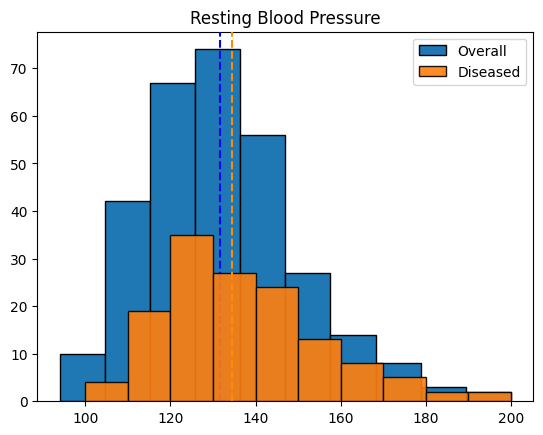

In [ ]:
#Resting BP

overall_bp = df["trestbps"]
filtered_bp = df_filtered["trestbps"]

plt.hist(overall_bp, bins = 10, edgecolor = "black", label = "Overall", zorder = 0)
plt.axvline(overall_bp.mean(), color='blue', linestyle='dashed', zorder = 10)

plt.hist(filtered_bp, bins = 10, edgecolor = "black", alpha = 0.9, label = "Diseased", zorder = 20)
plt.axvline(filtered_bp.mean(), color='darkorange', linestyle='dashed', zorder = 30)

plt.title("Resting Blood Pressure")
plt.legend()

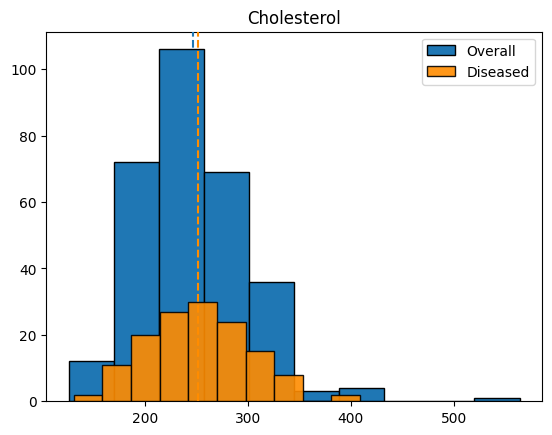

In [ ]:
#Cholesterol

overall_chol = df["chol"]
healthy_chol = df_healthy["chol"]
filtered_chol = df_filtered["chol"]


plt.hist(overall_chol, bins = 10, edgecolor = "black", label = "Overall", zorder = 0)
plt.axvline(overall_chol.mean(), linestyle='dashed', zorder = 10)

#plt.hist(healthy_chol, bins = 10, color='green', edgecolor = "black", label = "Healthy", zorder = 0)
#plt.axvline(healthy_chol.mean(), color='green', linestyle='dashed', zorder = 10)

plt.hist(filtered_chol, bins = 10, color='darkorange', edgecolor = "black", alpha = 0.9, label = "Diseased", zorder = 20)
plt.axvline(filtered_chol.mean(), color='darkorange', linestyle='dashed', zorder = 30)

plt.title("Cholesterol")
plt.legend()

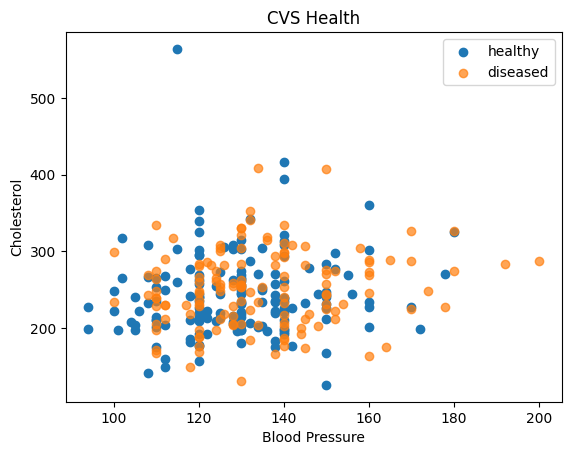

In [ ]:
#Blood Pressure & Cholesterol

healthy_bp = df_healthy["trestbps"]
healthy_chol = df_healthy["chol"]

diseased_bp = df_filtered["trestbps"]
diseased_chol = df_filtered["chol"]

plt.scatter(healthy_bp, healthy_chol, label = "healthy")
plt.scatter(diseased_bp, diseased_chol, alpha = 0.7, label = "diseased")

plt.xlabel("Blood Pressure")
plt.ylabel("Cholesterol")
plt.title("CVS Health")
plt.legend()

Text(0.5, 1.0, 'Proportion with fasting blood sugar >120mg/dl')

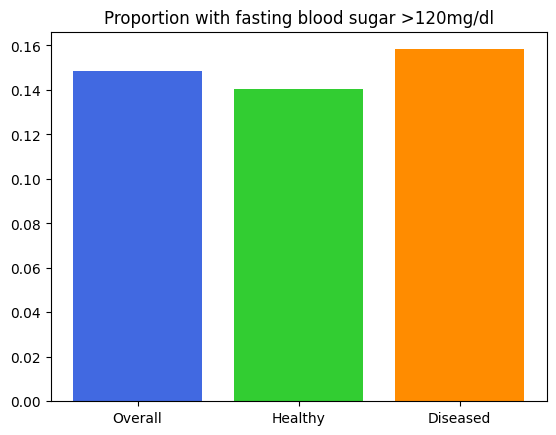

In [ ]:
#Blood Sugar

categories = ["Overall", "Healthy", "Diseased"]
avg_fbs = [df["fbs"].mean(), df_healthy["fbs"].mean(), df_filtered["fbs"].mean(),]

plt.bar (categories, avg_fbs, color = ["royalblue", "limegreen", "darkorange"])
plt.title("Proportion with fasting blood sugar >120mg/dl")

Text(0.5, 1.0, 'ST depression induced by exercise relative to rest')

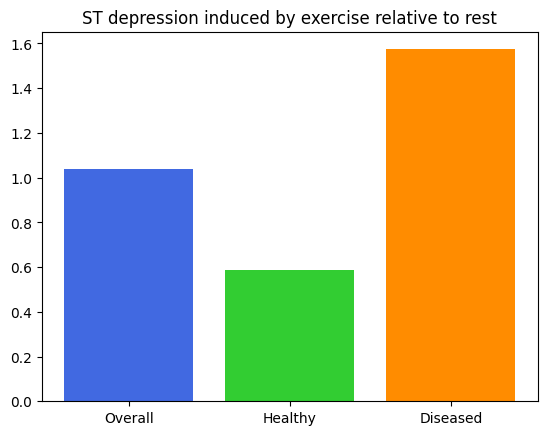

In [ ]:
#ST Depression

categories = ["Overall", "Healthy", "Diseased"]
avg_peak = [df["oldpeak"].mean(), df_healthy["oldpeak"].mean(), df_filtered["oldpeak"].mean(),]

plt.bar (categories, avg_peak, color = ["royalblue", "limegreen", "darkorange"])
plt.title("ST depression induced by exercise relative to rest")

My calulcations for standard deviation and the means are _ consistent with the plots above because _.

# Step 5: Separating M/F (Observe bias)

In [ ]:
# Separating the data by sex and target
male = df[df["sex"] == 1]
female = df[df["sex"] == 0]

male_with_heart_disease = df_filtered[df_filtered["sex"] == 1]
female_with_heart_disease = df_filtered[df_filtered["sex"] == 0]

male_without_heart_disease = df_healthy[df_healthy["sex"] == 1]
female_without_heart_disease = df_healthy[df_healthy["sex"] == 0]

### Subplots showcasing the features from above, but this time, I further separated the data by Sex.
- Make two subplots per code-block below. One codeblock per feature, and one subplot per Sex.

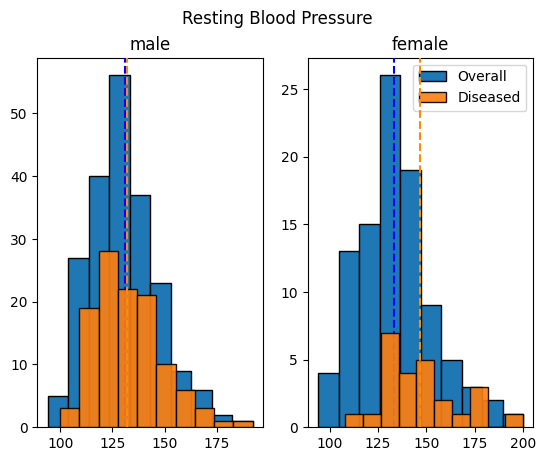

In [ ]:
# Blood Pressure
fig, axes = plt.subplots(1,2)

male_overall_bp = male["trestbps"]
male_diseased_bp = male_with_heart_disease["trestbps"]

female_overall_bp = female["trestbps"]
female_diseased_bp = female_with_heart_disease["trestbps"]

axes[0].hist(male_overall_bp, bins = 10, edgecolor = "black", label = "Overall", zorder = 0)
axes[0].axvline(male_overall_bp.mean(), color='blue', linestyle='dashed', zorder = 10)
axes[0].hist(male_diseased_bp, bins = 10, edgecolor = "black", alpha = 0.9, label = "Diseased", zorder = 20)
axes[0].axvline(male_diseased_bp.mean(), color='darkorange', linestyle='dashed', zorder = 30)

axes[1].hist(female_overall_bp, bins = 10, edgecolor = "black", label = "Overall", zorder = 0)
axes[1].axvline(female_overall_bp.mean(), color='blue', linestyle='dashed', zorder = 10)
axes[1].hist(female_diseased_bp, bins = 10, edgecolor = "black", alpha = 0.9, label = "Diseased", zorder = 20)
axes[1].axvline(female_diseased_bp.mean(), color='darkorange', linestyle='dashed', zorder = 30)



axes[0].set_title("male")
axes[1].set_title("female")

fig.suptitle("Resting Blood Pressure")
plt.legend()

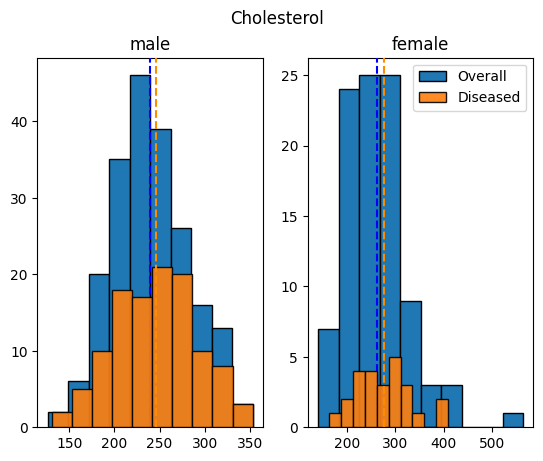

In [ ]:
# Cholesterol
fig, axes = plt.subplots(1,2)

male_overall_chol = male["chol"]
male_diseased_chol = male_with_heart_disease["chol"]

female_overall_chol = female["chol"]
female_diseased_chol = female_with_heart_disease["chol"]

axes[0].hist(male_overall_chol, bins = 10, edgecolor = "black", label = "Overall", zorder = 0)
axes[0].axvline(male_overall_chol.mean(), color='blue', linestyle='dashed', zorder = 10)
axes[0].hist(male_diseased_chol, bins = 10, edgecolor = "black", alpha = 0.9, label = "Diseased", zorder = 20)
axes[0].axvline(male_diseased_chol.mean(), color='darkorange', linestyle='dashed', zorder = 30)

axes[1].hist(female_overall_chol, bins = 10, edgecolor = "black", label = "Overall", zorder = 0)
axes[1].axvline(female_overall_chol.mean(), color='blue', linestyle='dashed', zorder = 10)
axes[1].hist(female_diseased_chol, bins = 10, edgecolor = "black", alpha = 0.9, label = "Diseased", zorder = 20)
axes[1].axvline(female_diseased_chol.mean(), color='darkorange', linestyle='dashed', zorder = 30)



axes[0].set_title("male")
axes[1].set_title("female")

fig.suptitle("Cholesterol")
plt.legend()

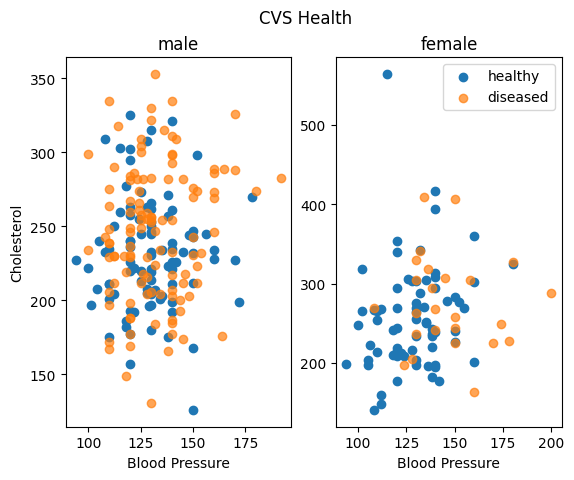

In [ ]:
#Blood Pressure & Cholesterol
fig, axes = plt.subplots(1,2)

male_healthy_bp = male_without_heart_disease["trestbps"]
male_healthy_chol = male_without_heart_disease["chol"]
male_diseased_bp = male_with_heart_disease["trestbps"]
male_diseased_chol = male_with_heart_disease["chol"]

female_healthy_bp = female_without_heart_disease["trestbps"]
female_healthy_chol = female_without_heart_disease["chol"]
female_diseased_bp = female_with_heart_disease["trestbps"]
female_diseased_chol = female_with_heart_disease["chol"]

axes[0].scatter(male_healthy_bp, male_healthy_chol, label = "healthy")
axes[0].scatter(male_diseased_bp, male_diseased_chol, alpha = 0.7, label = "diseased")

axes[1].scatter(female_healthy_bp, female_healthy_chol, label = "healthy")
axes[1].scatter(female_diseased_bp, female_diseased_chol, alpha = 0.7, label = "diseased")

axes[0].set_xlabel("Blood Pressure")
axes[1].set_xlabel("Blood Pressure")
axes[0].set_ylabel("Cholesterol")

axes[0].set_title("male")
axes[1].set_title("female")
fig.suptitle("CVS Health")
plt.legend()

Text(0.5, 0.98, 'Proportion with fasting blood sugar >120mg/dl')

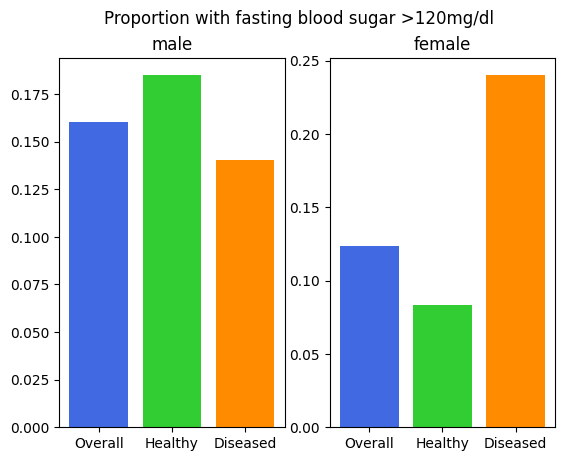

In [ ]:
#Blood Sugar
fig, axes = plt.subplots(1,2)

categories = ["Overall", "Healthy", "Diseased"]

male_avg_fbs = [male["fbs"].mean(), male_without_heart_disease["fbs"].mean(), male_with_heart_disease["fbs"].mean()]
female_avg_fbs = [female["fbs"].mean(), female_without_heart_disease["fbs"].mean(), female_with_heart_disease["fbs"].mean()]

axes[0].bar (categories, male_avg_fbs, color = ["royalblue", "limegreen", "darkorange"])
axes[1].bar (categories, female_avg_fbs, color = ["royalblue", "limegreen", "darkorange"])

axes[0].set_title("male")
axes[1].set_title("female")
fig.suptitle("Proportion with fasting blood sugar >120mg/dl")

Text(0.5, 0.98, 'ST depression induced by exercise relative to rest')

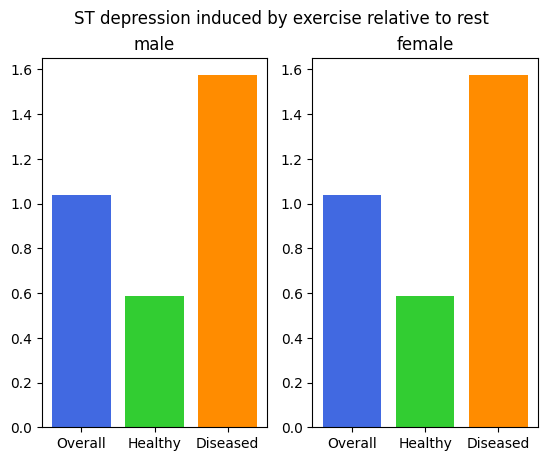

In [ ]:
#ST Depression
fig, axes = plt.subplots(1,2)

categories = ["Overall", "Healthy", "Diseased"]

male_avg_peak = [male["oldpeak"].mean(), male_without_heart_disease["oldpeak"].mean(), male_with_heart_disease["oldpeak"].mean()]
female_avg_peak = [female["oldpeak"].mean(), female_without_heart_disease["oldpeak"].mean(), female_with_heart_disease["oldpeak"].mean()]

axes[0].bar (categories, avg_peak, color = ["royalblue", "limegreen", "darkorange"])
axes[1].bar (categories, avg_peak, color = ["royalblue", "limegreen", "darkorange"])

axes[0].set_title("male")
axes[1].set_title("female")
fig.suptitle("ST depression induced by exercise relative to rest")